In [2]:
import ROOT, os, sys, glob
from math import *
ROOT.EnableImplicitMT();

print("\n".join(glob.glob("/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/*.root")))

Welcome to JupyROOT 6.30/04
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hbb_M20_Pt100_PU200.125X_v0.0.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hbb_M20_Pt100_PU200.125X_v0.1.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hbb_M40_Pt120_PU200.125X_v0.0.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hbb_M40_Pt120_PU200.125X_v0.1.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hbb_M60_Pt150_PU200.125X_v0.0.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hbb_M60_Pt150_PU200.125X_v0.1.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hcc_M20_Pt100_PU200.125X_v0.0.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hcc_M20_Pt100_PU200.125X_v0.1.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hcc_M20_Pt50to100_pythia8_PU200.125X_v0.1.root
/eos/cms/store/cmst3/group/l1tr/gpetrucc/f

Warning in <RTaskArenaWrapper>: CPU Bandwith Control Active. Proceeding with 4 threads accordingly


In [3]:
d = ROOT.RDataFrame("Events", "root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hcc_M20_Pt100_PU200.125X_v0.0.root")
d.Describe().Print()

Dataframe from TChain Events in file root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_MSSM_Hcc_M20_Pt100_PU200.125X_v0.0.root

Property                Value
--------                -----
Columns in total          423
Columns from defines        0
Event loops run             0
Processing slots            4

Column                          Type                            Origin
------                          ----                            ------
AK4GenJet_eta                   ROOT::VecOps::RVec<Float_t>     Dataset
AK4GenJet_mass                  ROOT::VecOps::RVec<Float_t>     Dataset
AK4GenJet_phi                   ROOT::VecOps::RVec<Float_t>     Dataset
AK4GenJet_pt                    ROOT::VecOps::RVec<Float_t>     Dataset
AK8GenJet_eta                   ROOT::VecOps::RVec<Float_t>     Dataset
AK8GenJet_mass                  ROOT::VecOps::RVec<Float_t>     Dataset
AK8GenJet_phi                   ROOT::VecOps::RVec<Float_t>     Dataset
AK8GenJet_p

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


Fraction of events with Higgs pT > 100:  1.0000
Fraction of events with matched SC8 jet: 0.9897


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1SC


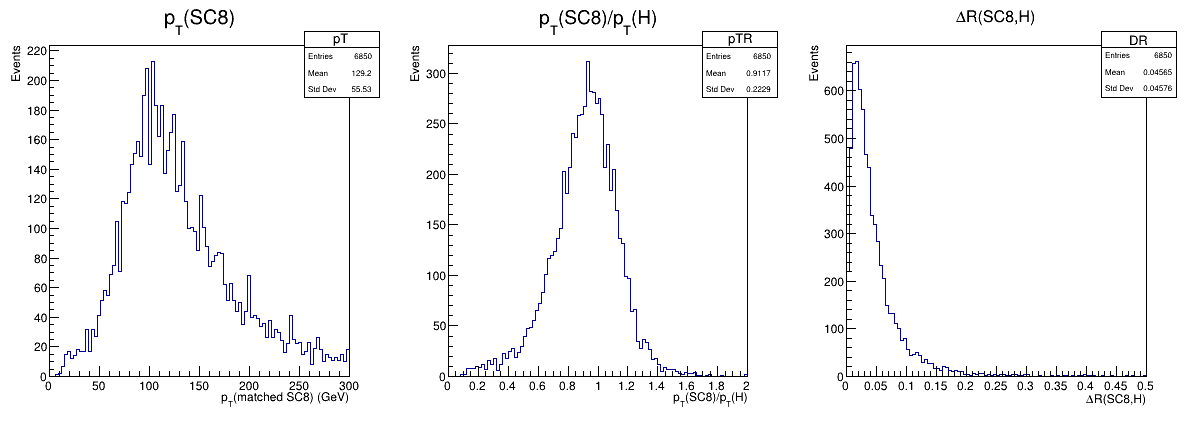

In [5]:
c1 = ROOT.TCanvas("c1SC","c1SC", 1200, 450)
dm = d.Define("iBestSC8", """
int iBest = -1; 
float drMin = 0;
for (int i = 0; i < nSC8Jet; ++i) {
    float dr = ROOT::VecOps::DeltaR(GenTruth_eta[0],SC8Jet_eta[i],GenTruth_phi[0],SC8Jet_phi[i]);
    if (dr < 0.5 && (iBest == -1 || dr < drMin)) {
        iBest = i;
    }
}
//std::cout << "iBestSC8 value: " << iBest << std::endl;//
return iBest;
""")

n0 = dm.Count()
#dm = dm.Filter("GenTruth_pt[0] > 100")
n1 = dm.Count()
dm = dm.Filter("iBestSC8 != -1")
n2 = dm.Count()
dm = dm.Define("DR", "ROOT::VecOps::DeltaR(GenTruth_eta[0],SC8Jet_eta[iBestSC8],GenTruth_phi[0],SC8Jet_phi[iBestSC8])")
dm = dm.Define("pT", "SC8Jet_pt[iBestSC8]")
dm = dm.Define("pTR", "SC8Jet_pt[iBestSC8]/GenTruth_pt[0]")
truthplots = [ dm.Histo1D(("pT","p_{T}(SC8);p_{T}(matched SC8) (GeV);Events",100,0,300), "pT"),
              dm.Histo1D(("pTR","p_{T}(SC8)/p_{T}(H);p_{T}(SC8)/p_{T}(H);Events",100,0,2), "pTR"),
              dm.Histo1D(("DR","#DeltaR(SC8,H);#DeltaR(SC8,H); Events",100,0,0.5), "DR")]
c1.Divide(3,1)
for i, h in enumerate(truthplots):
    c1.cd(i+1)
    h.Draw()
c1.Draw()
ept = n1.GetValue()/n0.GetValue()
ematch = n2.GetValue()/n1.GetValue()
print("Fraction of events with Higgs pT > 100:  %.4f" % ept)
print("Fraction of events with matched SC8 jet: %.4f" % ematch)

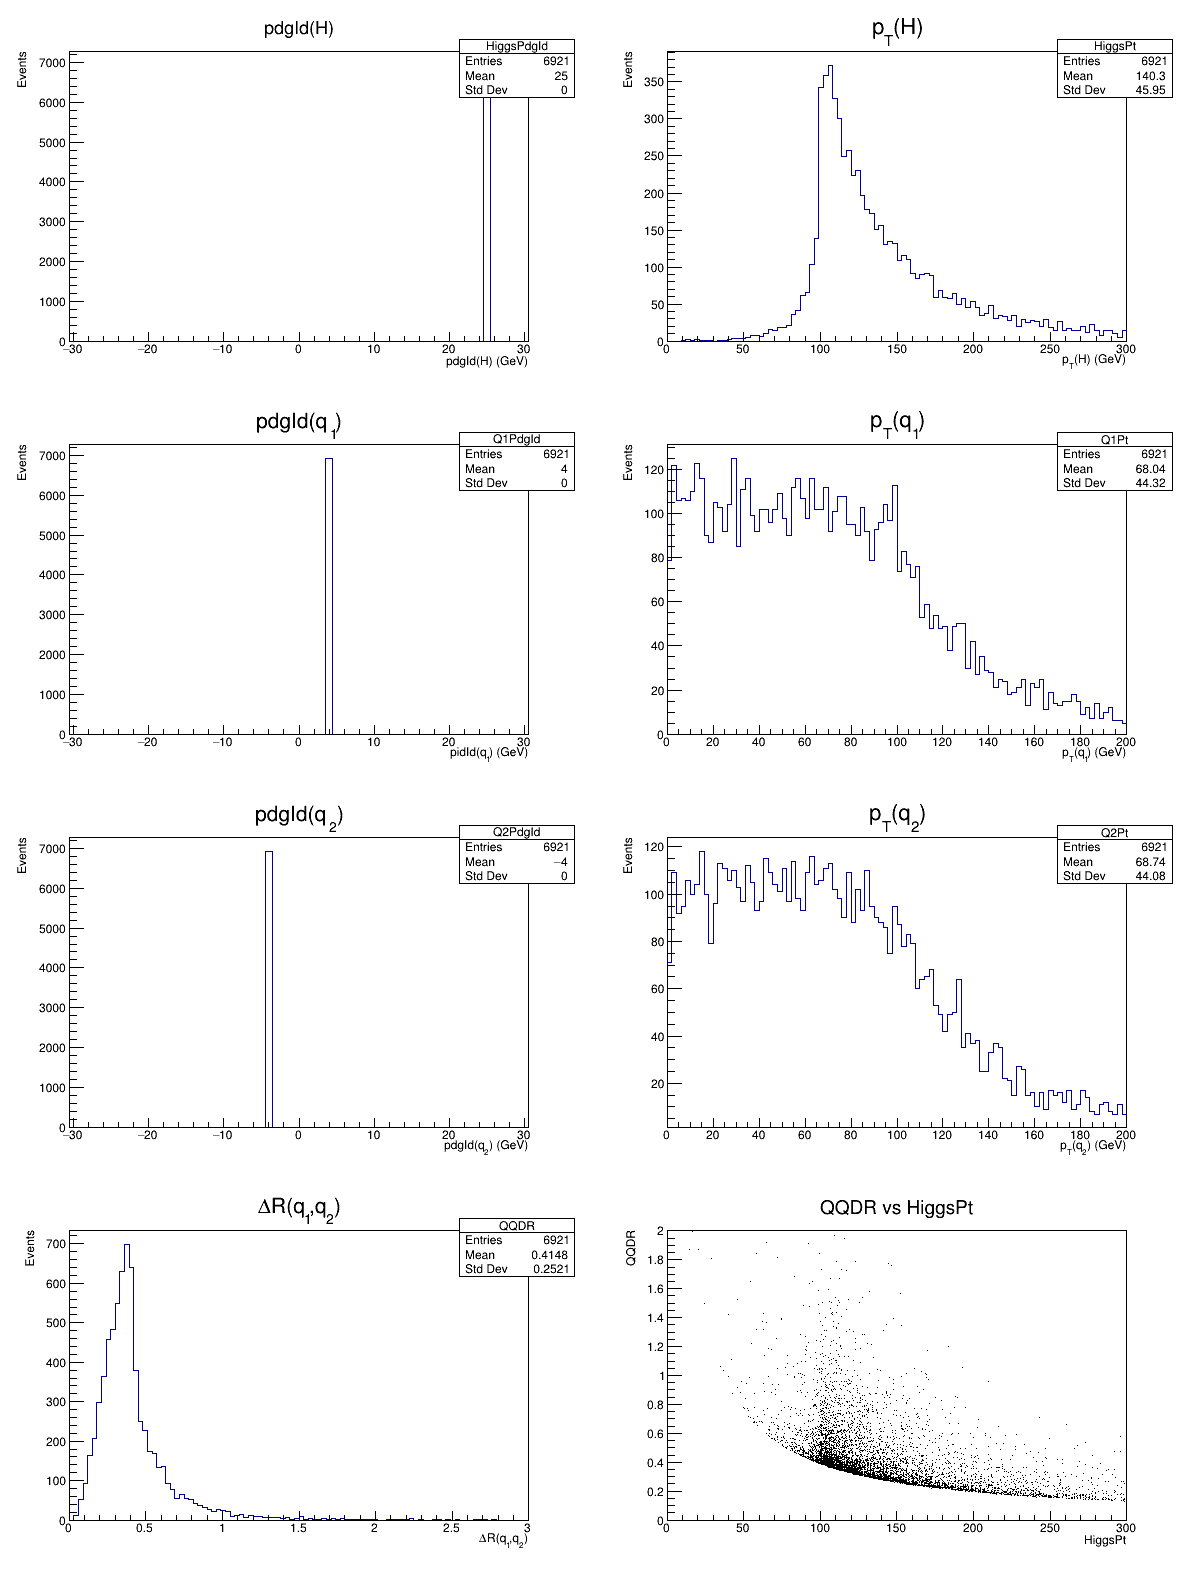

In [4]:
c1 = ROOT.TCanvas("c1Truth","c1Truth", 1200, 1600)
d2 = d.Define("HiggsPt", "GenTruth_pt[0]").Define("Q1Pt","GenTruth_pt[1]").Define("Q2Pt","GenTruth_pt[2]")
d2 = d2.Define("HiggsPdgId", "GenTruth_pdgId[0]").Define("Q1PdgId","GenTruth_pdgId[1]").Define("Q2PdgId","GenTruth_pdgId[2]")
d2 = d2.Define("QQDR","ROOT::VecOps::DeltaR(GenTruth_eta[1],GenTruth_eta[2],GenTruth_phi[1],GenTruth_phi[2])")
truthplots = [d2.Histo1D(("HiggsPdgId","pdgId(H);pdgId(H) (GeV);Events",61,-30.5,30.5), "HiggsPdgId"),
              d2.Histo1D(("HiggsPt","p_{T}(H);p_{T}(H) (GeV);Events",100,0,300), "HiggsPt"),
              d2.Histo1D(("Q1PdgId","pdgId(q_{1});pidId(q_{1}) (GeV);Events",61,-30.5,30.5), "Q1PdgId"),
              d2.Histo1D(("Q1Pt","p_{T}(q_{1});p_{T}(q_{1}) (GeV);Events",100,0,200), "Q1Pt"),
              d2.Histo1D(("Q2PdgId","pdgId(q_{2});pdgId(q_{2}) (GeV);Events",61,-30.5,30.5), "Q2PdgId"),
              d2.Histo1D(("Q2Pt","p_{T}(q_{2});p_{T}(q_{2}) (GeV);Events",100,0,200), "Q2Pt"),
              d2.Histo1D(("QQDR","#DeltaR(q_{1},q_{2});#DeltaR(q_{1},q_{2}); Events",100,0,3), "QQDR"),
              d2.Graph("HiggsPt","QQDR")]
c1.Divide(2,4)
for i, h in enumerate(truthplots):
    c1.cd(i+1)
    if "TGraph" in h.GetValue().ClassName():
        h.GetXaxis().SetRangeUser(0,300)
        h.GetYaxis().SetRangeUser(0,2)
        h.Draw("AP")
    else:
        h.Draw()
c1.Draw()

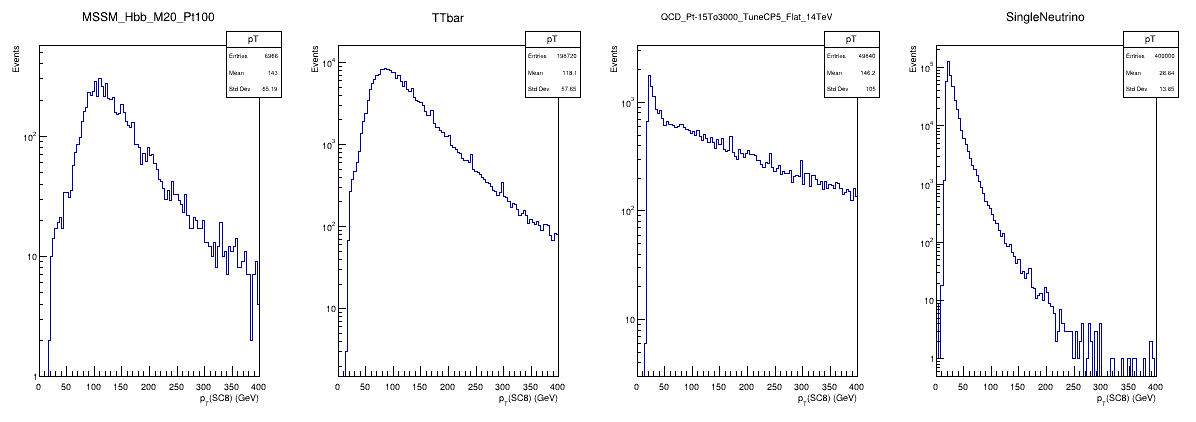

In [5]:
ds = [ (x,ROOT.RDataFrame("Events", f"root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/gpetrucc/fatjets/fatJetNTuple_{x}_PU200.125X_v0.0.root")) 
          for x in ("MSSM_Hbb_M20_Pt100", "TTbar", "QCD_Pt-15To3000_TuneCP5_Flat_14TeV", "SingleNeutrino")]
dds = [ (x,di.Define("pt0","SC8Jet_pt[0]")) for (x,di) in ds ]
hs = [ (x,di.Histo1D(("pT",x+";p_{T}(SC8) (GeV);Events",100,0,400), "pt0")) for (x,di) in dds ]
c1 = ROOT.TCanvas("c1SC8","c1SC8", 1200, 450)
c1.Divide(4,1)
for i, h in enumerate(hs):
    c1.cd(i+1)
    ROOT.gPad.SetLogy(True)
    h[1].Draw()
c1.Draw()